# Resolución del péndulo simple utilizando el método de Euler

In [119]:
import numpy as np
import matplotlib.pyplot as plt

Se van a correr los dos programas dentro de una misma línea, puesto que se quiere comparar la duración de la ejecución de ambos códigos

## Realización del programa utilizando los arreglos de numpy

Wall time: 0 ns
Wall time: 991 µs
Wall time: 1.01 ms


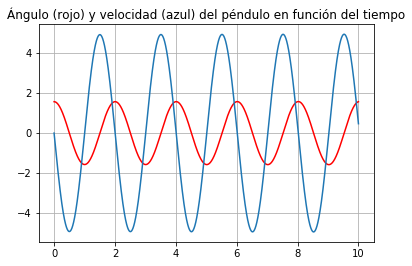

In [161]:
#Se checa el tiempo de ejecución con la línea ''%time'

#Se declaran las condiciones iniciales de la cuerda, la gravedad(m/s), y la longitud de la cuerda(m)
g = 9.81
l = 1
w = np.sqrt(g/l)

#Para la implementación del método de Euler, se descompone la EDO de segundo orden que describe al péndulo simple en dos EDO's
#Cada una de primer orden, las funciones se muestran a continuación
#Se utilizó O para el ángulo, v para la velocidad, y t para el tiempo
def Op(t,v):
    return v
def vp(t,O):
    return -w**2*O

#Se define el paso y el intervalo
h = 0.0001
a = 0
b = 10

#Se declaran las condiciones iniciales del sistema
t = 0
Oi = np.pi/2
vi = 0

#Se declaran los arreglos utilizando la libreria 'numpy', es sumamente sencillo de hacer, y no requiere mas que una linea de 
#código, para cada arreglo
%time t = np.arange(a,b,h)
%time O = np.zeros(len(t))
%time v = np.zeros(len(t))

#Establecemos las condiciones iniciales en los arreglos
O[0] = Oi
v[0] = vi

#Aplicamos el método de Euler
for i in range(len(t)-1):
    O[i+1] = O[i] + Op(t[i],v[i])*h
    v[i+1] = v[i] + vp(t[i],O[i])*h
    
#Graficamos las soluciones
plt.plot(t,O, color='r')
plt.plot(t,v)
plt.title("Ángulo (rojo) y velocidad (azul) del péndulo en función del tiempo")
plt.grid()

## Realización del programa sin la utilización de los arreglos de numpy

Wall time: 5 ms
Wall time: 5 ms
Wall time: 6 ms


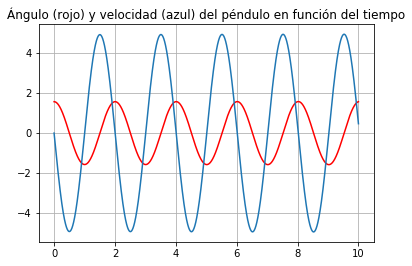

In [156]:
g = 9.81
l = 1
w = np.sqrt(g/l)

def Op(t,v):
    return v
def vp(t,O):
    return -w**2*O

h = 0.0001
a = 0
b = 10

t = 0
Oi = np.pi/2
vi = 0

#Para inicializar los arreglos, utilizaremos 'listas de compresión' que es análogo a crear las listas mediante la utilización
#de ciclos, tal y como se usa en lenguajes C/Fortran
%time t = [0 for i in range(100000)]
%time O = [0 for i in range(len(t))]
%time v = [0 for i in range(len(t))]

#Llenamos el arreglo 't' con los valores del tiempo, desde 0 hasta 10 con pasos de 0.001
#Creamos la variable aux para guardar la suma del tiempo
aux = 0
for i in range(100000):
    t[i] = aux
    aux = aux + h
    
#A partir de aqui, se implementa el método de Euler, por lo que el código es exactamente el mismo    
O[0] = Oi
v[0] = vi

for i in range(len(t)-1):
    O[i+1] = O[i] + Op(t[i],v[i])*h
    v[i+1] = v[i] + vp(t[i],O[i])*h
    
plt.plot(t,O, color='r')
plt.plot(t,v)
plt.title("Ángulo (rojo) y velocidad (azul) del péndulo en función del tiempo")
plt.grid()

Es evidente que mediante la utilización de los arreglos de numpy, el tiempo de ejecución del programa se reduce bastante, es mucho mas eficiente un código hecho usando esta herramienta que uno que no la usa.